## Load the dataset

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

## Exploratory Data Analysis

The helper function show_images() shows a total of 12 images by default and takes three main parameters: 
- The training images
- The class names
- And the training labels.

In [4]:
def show_images(train_images, class_names, train_models, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(15,15))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_models[i][0]])
    plt.show()

### visualising sample images

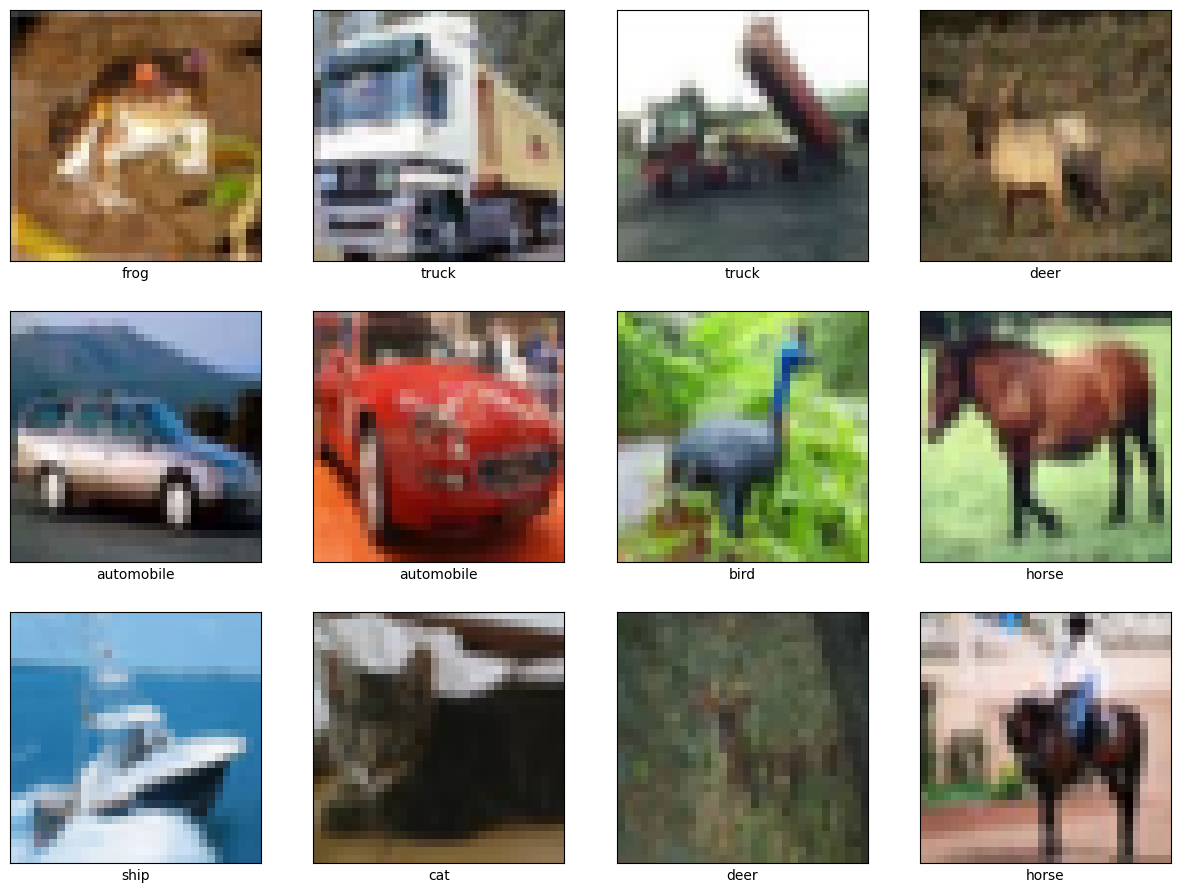

In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

show_images(train_images, class_names, train_labels)

### Normalise Data

Normalise pixel values to be between 0 and 1. It is places data on the same scale, so the network can learn more effectively.

In [6]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

### One-hot encode the models

In [7]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

## Model architechture

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

# variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SIZE = (2, 2)
FULLY_CONNECTED_NUM = 128
NUM_CLASSES = len(class_names)

inputs = tf.keras.Input(shape=INPUT_SHAPE)
layer1 = Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE)(inputs)
layer2 = MaxPooling2D(POOL_SIZE)(layer1)
layer3 = Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu')(layer2)
layer4 = MaxPooling2D(POOL_SIZE)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(FULLY_CONNECTED_NUM, activation='relu')(layer5)
output = Dense(NUM_CLASSES, activation='softmax')(layer6)

model = tf.keras.Model(inputs=inputs, outputs=output)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0     

## Model Training

In [29]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

# define metrics
METRICS = [
    'accuracy',
    Precision(name='precision'),
    Recall(name='recall')
]

# compile model
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=METRICS)

# train the model
history = model.fit(train_images, train_labels,
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3886 - accuracy: 0.5030 - precision: 0.7237 - recall: 0.2923 - val_loss: 1.2203 - val_accuracy: 0.5746 - val_precision: 0.7413 - val_recall: 0.4003
Epoch 2/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0310 - accuracy: 0.6402 - precision: 0.7753 - recall: 0.5025 - val_loss: 1.0831 - val_accuracy: 0.6204 - val_precision: 0.7194 - val_recall: 0.5102
Epoch 3/30
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8931 - accuracy: 0.6900 - precision: 0.7984 - recall: 0.5797 - val_loss: 0.9113 - val_accuracy: 0.6895 - val_precision: 0.7914 - val_recall: 0.5882
Epoch 4/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7913 - accuracy: 0.7237 - precision: 0.8164 - recall: 0.6338 - val_loss: 0.9374 - val_accuracy: 0.6825 - val_precision: 0.7694 - val_recall: 0.6015
Epoch 5/30
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7032 - a

## Evaluate the model

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def show_performance_curve(training_result, metric, metric_label):
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_' + str(metric)]
    intersection_index = np.argwhere(np.isclose(
        train_perf, validation_perf, atol=1e-2
    )).flatten()[0]
    intersection_value = train_perf[intersection_index]

    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label='val_' + metric_label)
    plt.axvline(x=intersection_index, color='r', linestyle='--', label='Intersection')
    plt.annotate(
        f'Optimal Value: {intersection_value:.4f}',
        xy=(intersection_index, intersection_value),
        xycoords='data',
        fontsize=10,
        color='green',
    )
    plt.xlabel('Epochs')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

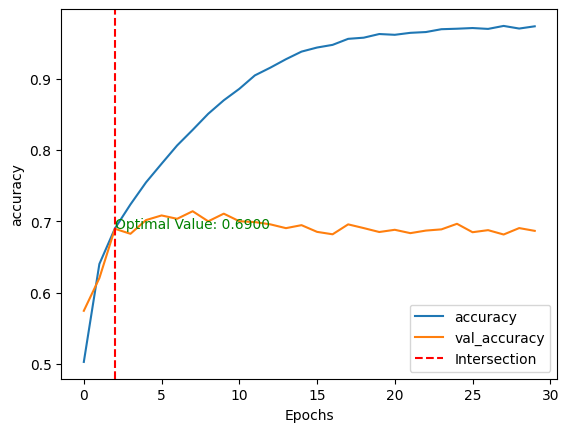

In [31]:
show_performance_curve(history, 'accuracy', 'accuracy')

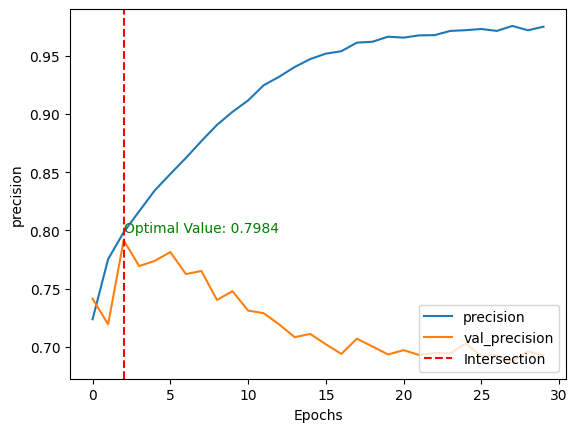

In [32]:
show_performance_curve(history, 'precision', 'precision')

## Plotting the confusuion matrix

313/313 [==============================] - 1s 4ms/step


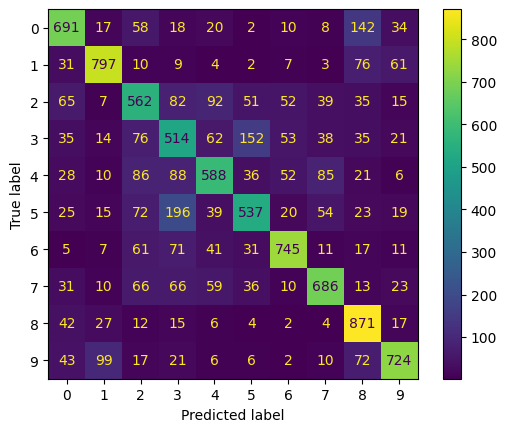

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)
test_predictions_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(test_true_labels, test_predictions_labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()